In [1]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 14/12/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 18/11/2022\nPython version: 3.8.8\n'

# Bechdel Analysis
>The Bechdel test is a commonly used tool to evaluate the representation of women in fiction. To pass the test, a work of fiction must meet the following three criteria:
\
-It must have at least two named female characters.\
-Those two female characters must have a conversation with each other.\
-That conversation must be about something other than a man.\
While the Bechdel test is not perfect, it is a useful tool to identify gender imbalance in works of fiction. By requiring that female characters have their own agency and agency and engage in conversations with each other about topics other than men, the test encourages writers to create more well-rounded and realistic female characters. We have found a dataset which 



---
## General Information <a id="GI"> </a> 

### Folder structure <a id="Folder"> </a>


### Imports <a id="Imports"> </a>

***Libraries used for milestone 2:***
- python=3.8.12
- pandas
- ast
- datetime
- seaborn
- numpy
- matplotlib
- json

In [89]:
#Imports used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t 

---
##  Data scraping, pre-processing and dataset construction<a id="Step-1"> </a>

### Pre-processing <a id="#Pre-pro"> </a>
>basic sanity checks etc...

>We are going to load the bechdel dataset. It was downloaded from kaggle https://www.kaggle.com/datasets/alisonyao/movie-bechdel-test-scores?resource=download&select=Bechdel_detailed.csv. 

In [90]:
#Importing the dataset Bechdel.csv and creating a dataframe
bechdel= pd.read_csv('Bechdel.csv', sep = ';', encoding = 'latin-1')



FileNotFoundError: [Errno 2] No such file or directory: 'Bechdel.csv'

In [80]:
#it seems that there has been a typo for the year of the first row of the dataset, replace it with the correct year which is 2010
bechdel.loc[0, 'year'] = 2010
bechdel.head()
#put the first row close to the other rows with the same year
bechdel = bechdel.sort_values(by=['year'])
bechdel.head(10)


,imdbid,title,year,rating
1,3155794,Passage de Venus,1874,0
2,14495706,La Rosace Magique,1877,0
3,2221420,Sallie Gardner at a Gallop,1878,0
4,12592084,Le singe musicien,1878,0
5,7816420,Athlete Swinging a Pick,1881,0
6,5459794,Buffalo Running,1883,0
7,8588366,L&#39;homme machine,1885,0
11,7541160,Jumping Over a Man&#39;s Back-Leapfrog,1887,0
13,8361552,Baboon Climbing a Pole,1887,0
12,7754902,Man Riding Jumping Horse,1887,0


In [81]:
print('there are',len(bechdel),'movies in the bechdel dataset')

there are 9802 movies in the bechdel dataset


In [82]:
#check for repeated values in the columns
print('there are',len(bechdel['imdbid'].unique()),'unique imdbids')
print('there are',len(bechdel['title'].unique()),'unique titles')


there are 9795 unique imdbids
there are 9557 unique titles


## TODO regarder la procédure pour les duplicates dans les rows 

In [83]:
#delete rows with duplicate imdbids and titles, we will delete approximately 250 rows 
bechdel = bechdel.drop_duplicates(subset=['imdbid'], keep='first')
bechdel = bechdel.drop_duplicates(subset=['title'], keep='first')
print(len(bechdel))
bechdel.title.is_unique



9555


True

In [84]:
bechdel.isna().any()

imdbid    False
title     False
year      False
rating    False
dtype: bool

In [85]:
#reset the index of the dataframe
bechdel = bechdel.reset_index(drop=True)
bechdel

,imdbid,title,year,rating
0,3155794,Passage de Venus,1874,0
1,14495706,La Rosace Magique,1877,0
2,2221420,Sallie Gardner at a Gallop,1878,0
3,12592084,Le singe musicien,1878,0
4,7816420,Athlete Swinging a Pick,1881,0
...,...,...,...,...
9550,12141112,Metal Lords,2022,1
9551,13352968,"Good luck to you, Leo Grande",2022,3
9552,9783600,Spiderhead,2022,1
9553,14128670,Kimi,2022,2


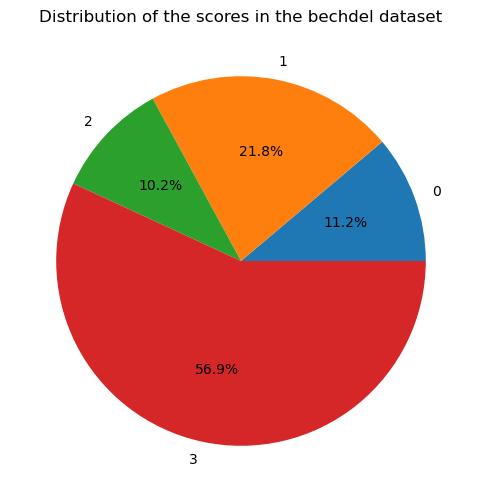

In [86]:
score0 = bechdel[bechdel['rating'] ==0]
score1 = bechdel[bechdel['rating'] ==1]
score2 = bechdel[bechdel['rating'] ==2]
score3 = bechdel[bechdel['rating'] ==3]

#plot score0, score1, score, score3 in pie chart
plt.figure(figsize=(6,6))
plt.pie([len(score0), len(score1), len(score2), len(score3)], labels=['0', '1', '2', '3'], autopct='%1.1f%%')
plt.title('Distribution of the scores in the bechdel dataset')
plt.show()


> From the above plot, it appears that the test isn't that difficult to pass as more than a half of the movies in the dataset 

### first exploration of the dataset <a id="#explo"> </a>
>